In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/medytative/data/master/NYC_Crimes_2013.csv', header=4)
df.head(10)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0.0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0.0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8.0,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0.0,NaN,3,4,16,223,53,165,5,NaN
5,Alfred Village,"4,089",5,0.0,NaN,0,3,2,46,10,36,0,NaN
6,Allegany Village,"1,781",3,0.0,NaN,0,0,3,10,0,10,0,0.0
7,Amherst Town,"118,296",107,1.0,NaN,7,31,68,"2,118",204,"1,882",32,3.0
8,Amityville Village,"9,519",9,0.0,NaN,2,4,3,210,16,188,6,1.0
9,Amsterdam,"18,182",30,0.0,NaN,0,12,18,405,99,291,15,0.0


## Cleaning Data

In [3]:
(df.iloc[:,4] > 0).value_counts()

False    351
Name: Rape\n(revised\ndefinition)1, dtype: int64

In [4]:
df = df.drop(df.columns[4], axis=1) #Dropping Rape 1 column
df = df.drop(df.index[-3:], axis=0) #Removing last 3 lines which are simply subscript
df.drop_duplicates(subset='City', keep='first', inplace=True) #Dropping any duplicate city names
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.0,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0.0,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0.0,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8.0,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0.0,3,4,16,223,53,165,5,NaN


In [5]:
# Replacing all NaN values in Arson column with a 0

arson_series = df.Arson3
arson_series = arson_series.replace(to_replace=(arson_series.iloc[-1]), value=0.0)
df['Arson3'] = arson_series

In [6]:
# Renaming some of the more dense column names

new_names = df.columns.values
new_names[2] = 'Violent crime'
new_names[3] = 'Murder & manslaughter'
new_names[4] = 'Rape'
new_names[6] = 'Aggravated assault'
new_names[-3] = 'Larceny'
new_names[-2] = 'Motor vehicle theft'
new_names[-1] = 'Arson'

df.columns = new_names
df.head()

,City,Population,Violent crime,Murder & manslaughter,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny,Motor vehicle theft,Arson
0,Adams Village,"1,861",0,0.0,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0.0,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0.0,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8.0,30,227,526,"4,090",705,"3,243",142,0.0
4,Albion Village,"6,388",23,0.0,3,4,16,223,53,165,5,0.0


In [7]:
# Converting string values into floats

for var in df.columns.values[1:3]:
    df[var] = df[var].apply(lambda x: x.replace(',', ''))
    df[var] = df[var].apply(lambda x: float(x))
    
for var in df.columns.values[4:-1]:
    df[var] = df[var].apply(lambda x: x.replace(',', ''))
    df[var] = df[var].apply(lambda x: float(x))

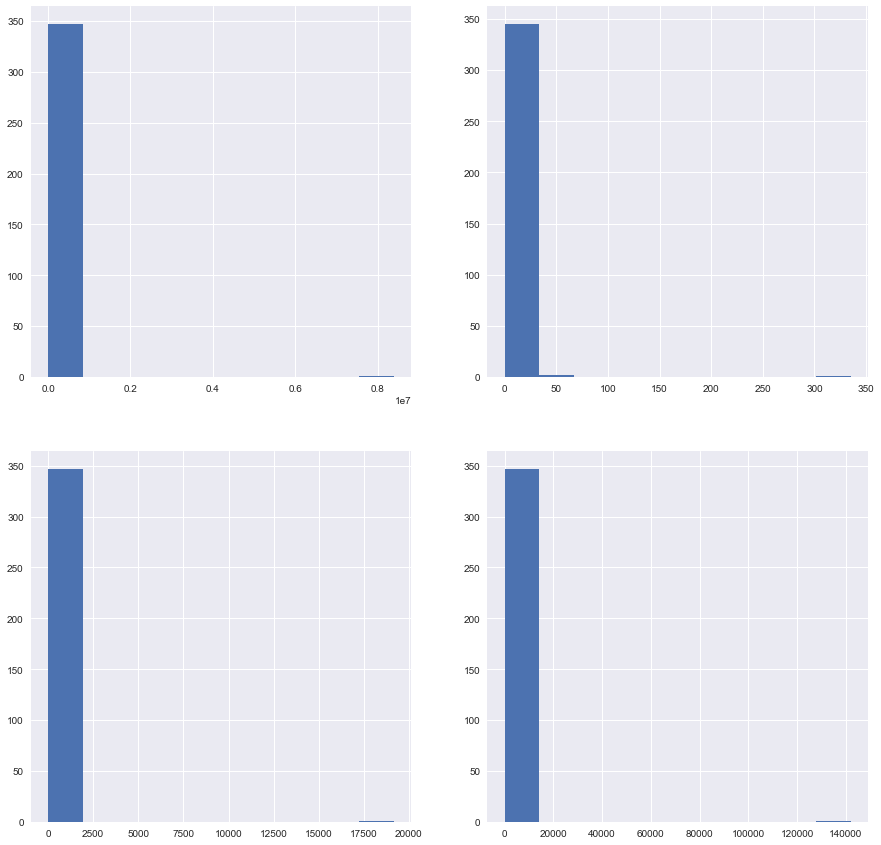

In [8]:
# Histograms to see if there are any extreme outliers

sns.set()
f, ax = plt.subplots(figsize=(15,15))

data = [df.Population, df['Murder & manslaughter'], df['Robbery'], df['Property\ncrime']]
count = 0
for data_name in data:
    global count
    ax = plt.subplot(2,2, count+1)
    plt.hist(data_name)
    plt.show
    count+=1

In [9]:
df[df['Population']>1000000]

,City,Population,Violent crime,Murder & manslaughter,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny,Motor vehicle theft,Arson
216,New York,8396126.0,52384.0,335.0,1112.0,19170.0,31767.0,141971.0,16606.0,117931.0,7434.0,0.0


New York is a huge outlier in the data. For regression analysis purposes, we will create run our model on our current dataset with and without New York datapoint to test efficiency.

In [10]:
# Creating new dataframe for analysis

crime1 = pd.DataFrame(df.City)
crime1['property_crime'] = df['Property\ncrime']
crime1['population'] = df['Population']
crime1['pop squared'] = df['Population'].apply(lambda x: x**2)
crime1['murder'] = np.where(df['Murder & manslaughter'] > 0,1,0)
crime1['robbery'] = np.where(df['Robbery'] > 0,1,0)

crime2 = crime1[crime1['population']<100000]

## Check for Accurate Assumptions for Regression Model

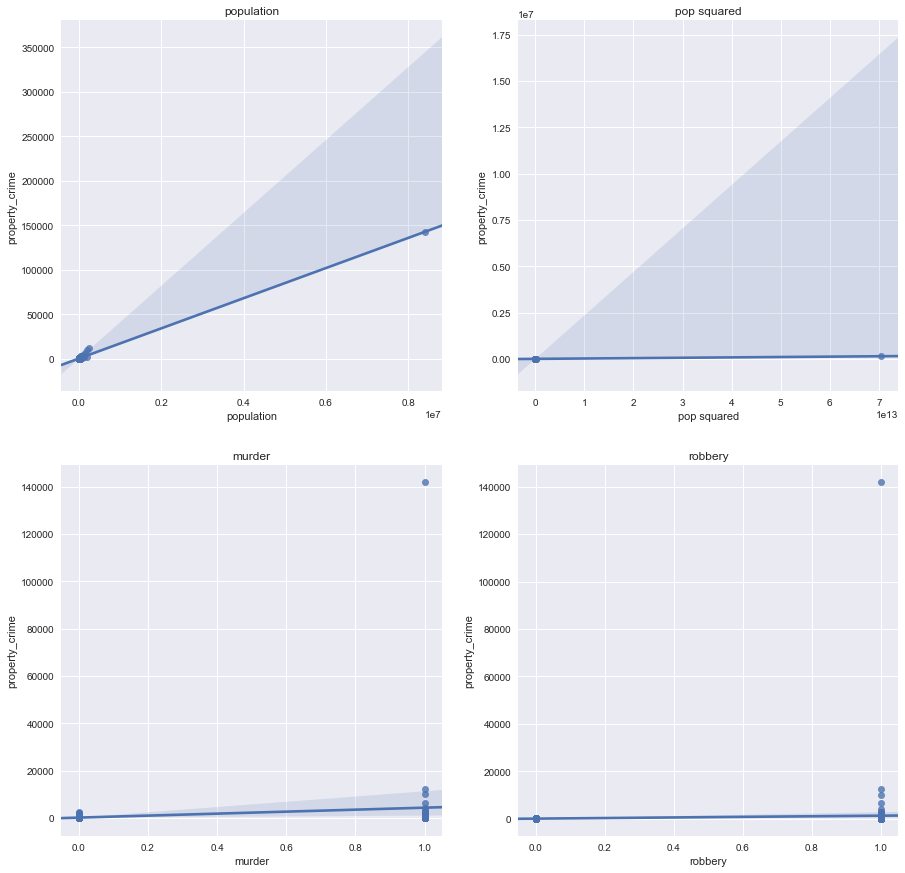

In [20]:
# Do all variables have a linear relationship with outcome variable

f, ax = plt.subplots(figsize = (15,15))
count = 1

for col in crime2.columns[2:]:
    global count
    ax = plt.subplot(2,2,count)
    sns.regplot(crime2[col], crime2['property_crime'], scatter=True)
    plt.title(col)
    plt.show
    count+=1

In [21]:
# Instantiate and fit our model.
from sklearn import linear_model
regr = linear_model.LinearRegression()
Y = crime1['property_crime'].values.reshape(-1, 1)
X = crime1[['population','pop squared','murder','robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  3.46570268e-02  -2.11108019e-09   1.51866535e+01  -9.62774363e+01]]

Intercept: 
 [-109.57533562]

R-squared:
0.996124710499


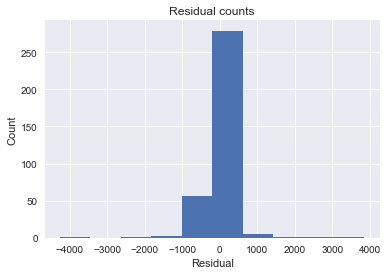

In [22]:
# Checking for multivariate normality

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = crime1['property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

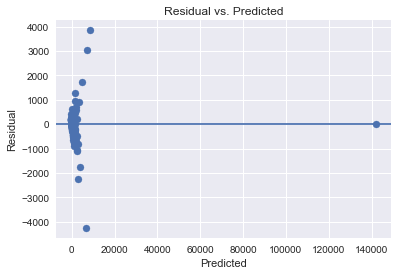

In [23]:
# Checking for homoscedasticity

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [24]:
# Checking for low multicollinearity

correlation_matrix = X.corr()
display(correlation_matrix)

,population,pop squared,murder,robbery
population,1.000000,0.998264,0.162309,0.064371
pop squared,0.998264,1.000000,0.133067,0.043983
murder,0.162309,0.133067,1.000000,0.313271
robbery,0.064371,0.043983,0.313271,1.000000
